In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os

In [108]:
def gauss(image):
    return cv.GaussianBlur(image, (7, 7), 3)

def canny(image):
    return cv.Canny(image, 120, 200)

def region(image):
    height, width = image.shape
    mask = np.zeros_like(image)
    triangle = np.array([[
        (0, height),
        (width, height),
        (width/2, height/2)
    ]], np.int32)
    cv.fillPoly(mask, triangle, 255)
    masked_image = cv.bitwise_and(image, mask)
    return masked_image

def average(image, lines):
    left = []
    right = []
    for line in lines:
        # print(line)
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
            
    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line, right_line]).astype("int32")


def make_points(image, average): 
    print(average)
    print(type(average))
    slope, y_int = average 
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    x1 = int((y1 - y_int) // slope)
    x2 = int((y2 - y_int) // slope)
    return np.array([x1, y1, x2, y2])


def display_lines(image, lines):
    lines_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line

            cv.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return lines_image

def detect_lines(image):
    copy = np.copy(image)
    blur = gauss(image)
    edges = canny(blur)
    masked = region(edges) 
    lines = cv.HoughLinesP(masked, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average(copy, lines)
    black_lines = display_lines(copy, averaged_lines)
    lanes = cv.addWeighted(copy, 0.8, black_lines, 1, 1)

    plt.figure(figsize=(20, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Original")

    plt.subplot(2, 3, 2)
    plt.imshow(blur)
    plt.title("Gaussian Blur")

    plt.subplot(2, 3, 3)
    plt.imshow(edges)
    plt.title("Canny")

    plt.subplot(2, 3, 4)
    plt.imshow(region(cv.cvtColor(image, cv.COLOR_RGB2GRAY)), cmap="gray")
    plt.title("Masked Original")

    plt.subplot(2, 3, 5)
    plt.imshow(masked)
    plt.title("Masked")

    plt.subplot(2, 3, 6)
    plt.imshow(lanes)
    plt.title("Lanes")

    plt.show()



<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
[-6.74937305e-01  8.53200000e+02]
<class 'numpy.ndarray'>
[ 0.61363636 30.        ]
<class 'numpy.ndarray'>


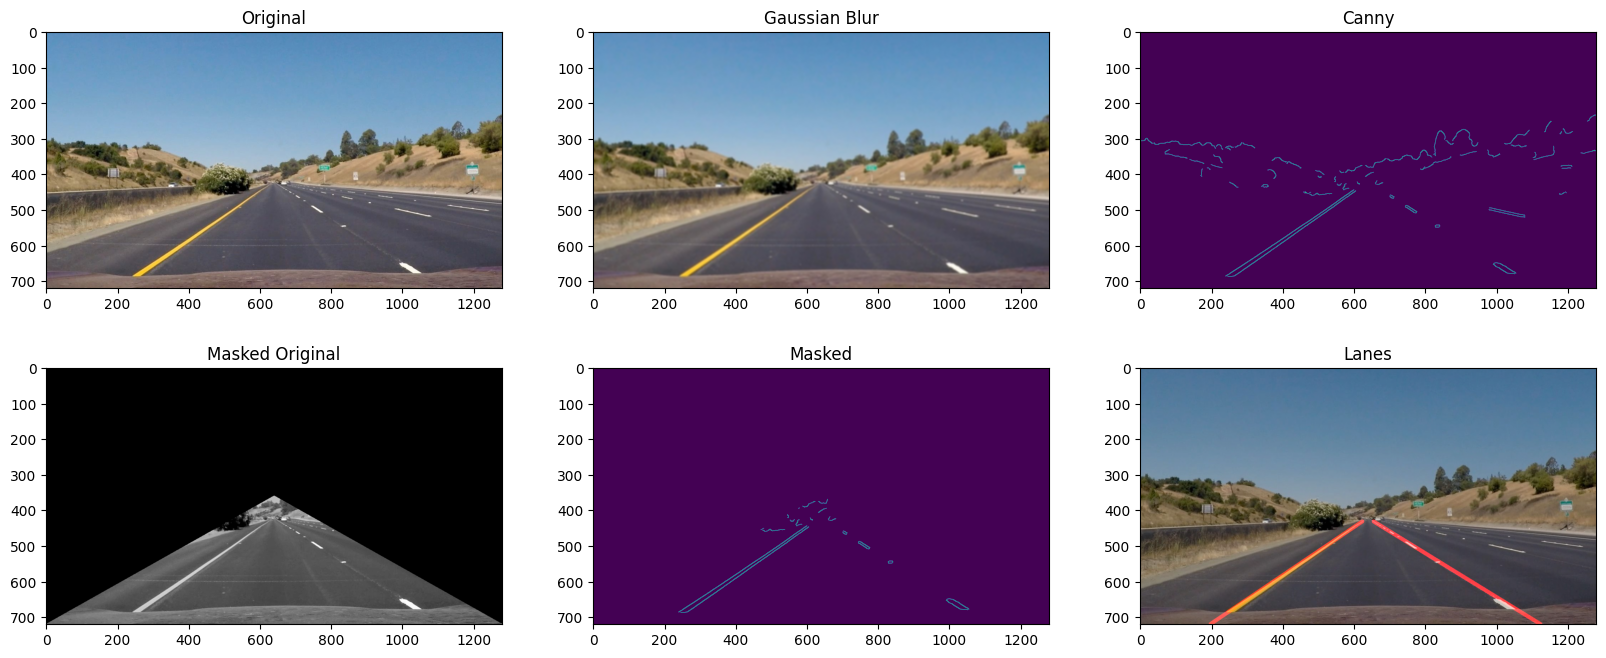

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
[-7.11005592e-01  8.71000000e+02]
<class 'numpy.ndarray'>
[ 0.56992169 54.42857143]
<class 'numpy.ndarray'>


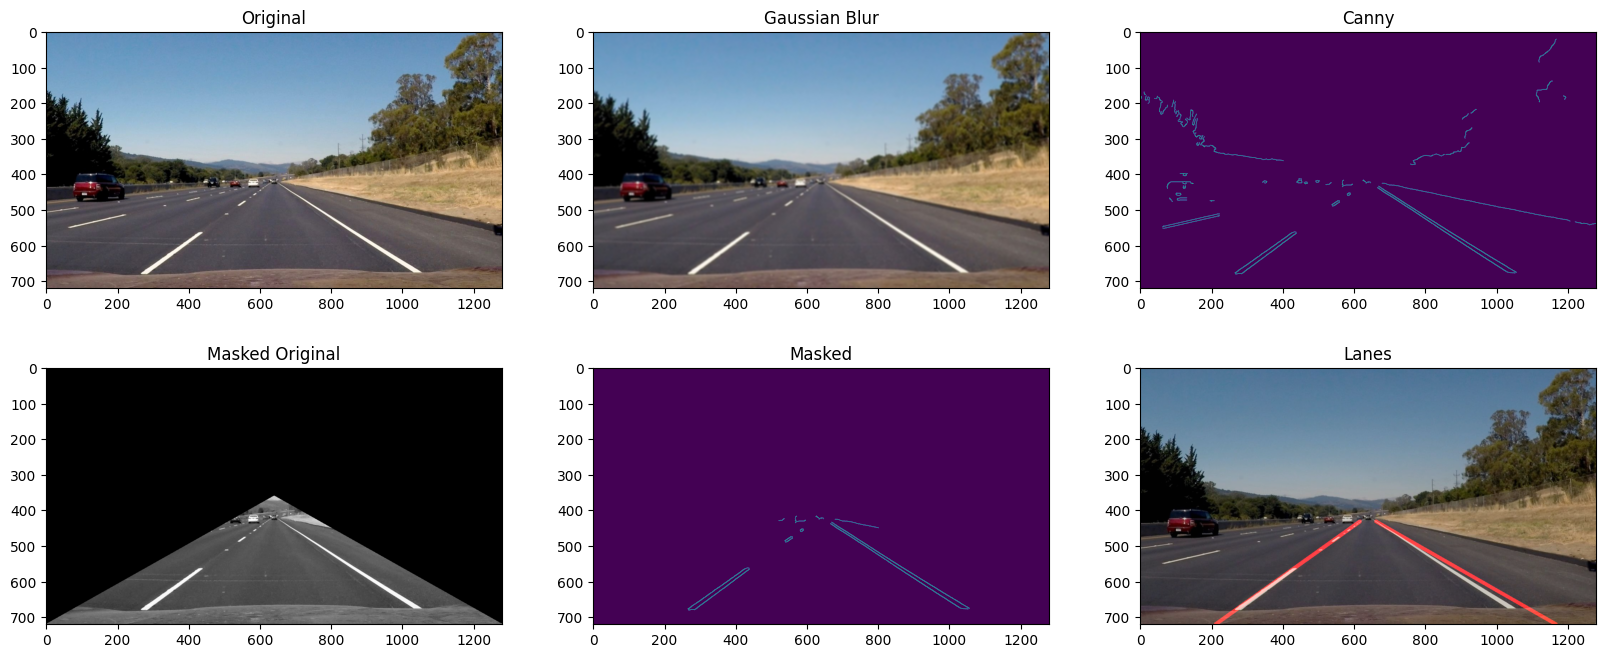

<class 'int'>
<class 'int'>
[-3.25e-01  6.35e+02]
<class 'numpy.ndarray'>
[1.09256883e-15 4.40000000e+02]
<class 'numpy.ndarray'>


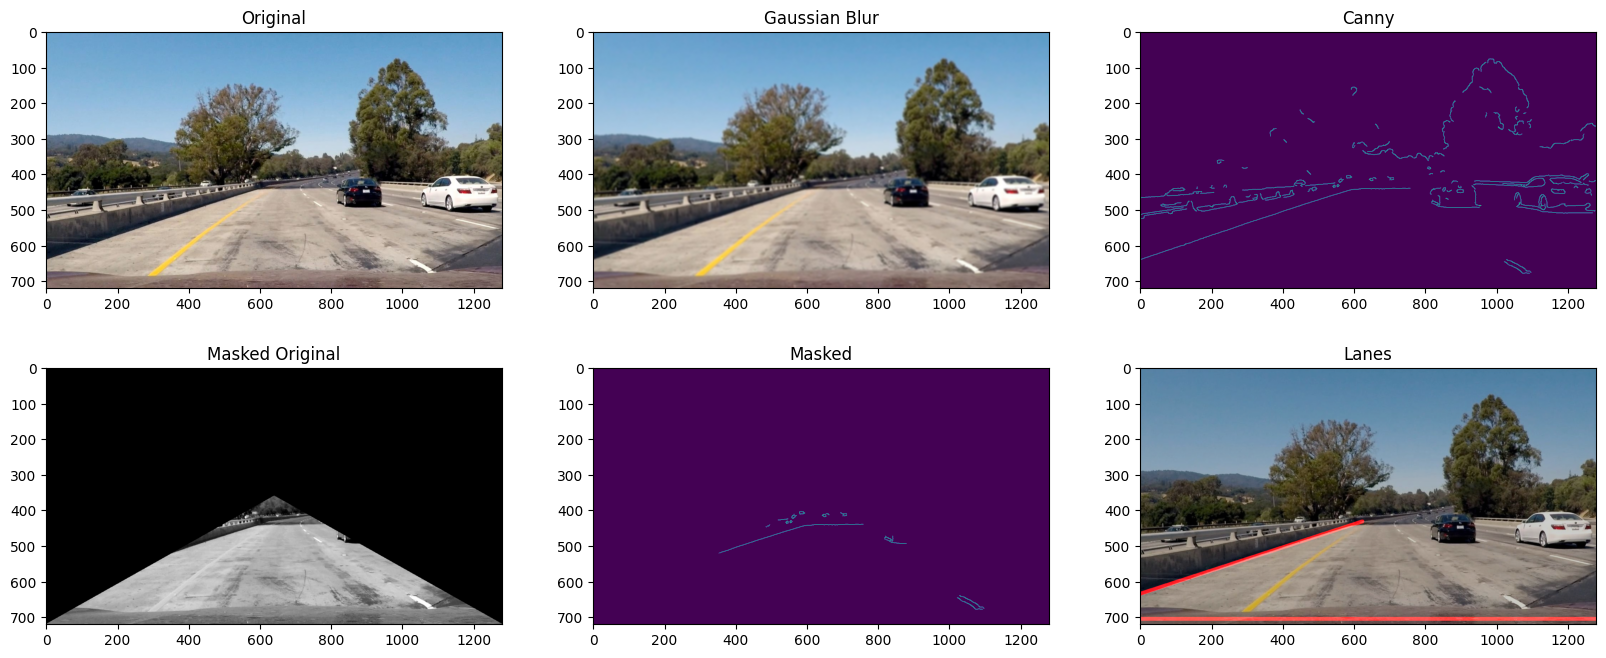

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
[-8.90800898e-01  9.81333333e+02]
<class 'numpy.ndarray'>
nan
<class 'numpy.float64'>


TypeError: cannot unpack non-iterable numpy.float64 object

In [109]:
# img = cv.imread("data/img/Udacity/image001.jpg")
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# detect_lines(img)

for image_index in range(1, 10):
    img = cv.imread(f"data/img/Udacity/image00{image_index}.jpg")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    detect_lines(img)
    
